# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
#helper.download_extract('celeba', data_dir)

Found mnist Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

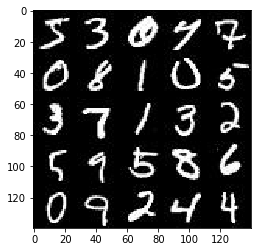

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

In [ ]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


C:\Anaconda3\envs\dl\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [85]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.1
    
    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 128, 5, strides=2,kernel_initializer=kinit, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2,kernel_initializer=kinit, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #print(x2.shape)
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2,kernel_initializer=kinit, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        #print(x3.shape)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [86]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    
    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('generator',reuse=(not is_train)):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1,kernel_initializer=kinit, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2,kernel_initializer=kinit, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        #print(x3.shape)
        #print(out_channel_dim)
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2,kernel_initializer=kinit, padding='same')
        # 28x28x3 now
        #print(logits.shape)
    return logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [87]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function

    alpha=0.1
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_real_out, d_real_logits = discriminator(input_real)
    d_fake_out, d_fake_logits = discriminator(g_model, reuse=True)
    
    smooth = 0.1
    real_labels = tf.ones_like(d_real_out) * (1 - smooth)
    fake_labels = tf.zeros_like(d_fake_out)
    g_labels    = tf.ones_like(d_fake_out)

    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=real_labels))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=fake_labels))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=g_labels))

    d_loss = d_real_loss + d_fake_loss
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [88]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    

    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_opt, g_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [89]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [90]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # TODO: Build Model
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7371... Generator Loss: 1.2454
Epoch 1/2... Discriminator Loss: 2.3695... Generator Loss: 0.1791
Epoch 1/2... Discriminator Loss: 0.8771... Generator Loss: 1.2664
Epoch 1/2... Discriminator Loss: 0.7832... Generator Loss: 4.8113
Epoch 1/2... Discriminator Loss: 0.4549... Generator Loss: 2.7379
Epoch 1/2... Discriminator Loss: 0.8031... Generator Loss: 1.1767
Epoch 1/2... Discriminator Loss: 0.5126... Generator Loss: 2.0824
Epoch 1/2... Discriminator Loss: 0.4871... Generator Loss: 2.4314
Epoch 1/2... Discriminator Loss: 0.7359... Generator Loss: 1.3617
Epoch 1/2... Discriminator Loss: 1.3552... Generator Loss: 5.5012


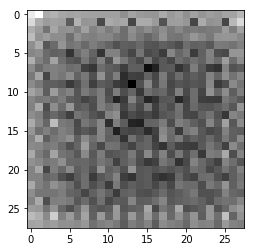

Epoch 1/2... Discriminator Loss: 0.5665... Generator Loss: 2.4542
Epoch 1/2... Discriminator Loss: 0.8623... Generator Loss: 1.1837
Epoch 1/2... Discriminator Loss: 0.5745... Generator Loss: 2.3319
Epoch 1/2... Discriminator Loss: 1.4709... Generator Loss: 0.5273
Epoch 1/2... Discriminator Loss: 0.9099... Generator Loss: 1.1583
Epoch 1/2... Discriminator Loss: 0.6625... Generator Loss: 1.4876
Epoch 1/2... Discriminator Loss: 0.8001... Generator Loss: 1.1897
Epoch 1/2... Discriminator Loss: 0.5072... Generator Loss: 2.4760
Epoch 1/2... Discriminator Loss: 0.5635... Generator Loss: 2.9052
Epoch 1/2... Discriminator Loss: 0.8432... Generator Loss: 1.0269


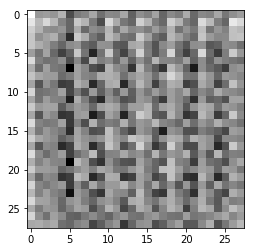

Epoch 1/2... Discriminator Loss: 1.4449... Generator Loss: 0.5858
Epoch 1/2... Discriminator Loss: 0.5418... Generator Loss: 2.0046
Epoch 1/2... Discriminator Loss: 0.5104... Generator Loss: 2.6718
Epoch 1/2... Discriminator Loss: 0.5847... Generator Loss: 1.7370
Epoch 1/2... Discriminator Loss: 0.9309... Generator Loss: 0.9456
Epoch 1/2... Discriminator Loss: 0.4608... Generator Loss: 3.0516
Epoch 1/2... Discriminator Loss: 0.4720... Generator Loss: 2.5252
Epoch 1/2... Discriminator Loss: 0.5773... Generator Loss: 1.7050
Epoch 1/2... Discriminator Loss: 0.5262... Generator Loss: 2.0846
Epoch 1/2... Discriminator Loss: 0.7636... Generator Loss: 1.2077


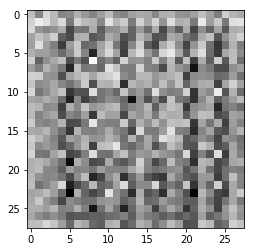

Epoch 1/2... Discriminator Loss: 0.4364... Generator Loss: 2.6630
Epoch 1/2... Discriminator Loss: 0.4318... Generator Loss: 2.6704
Epoch 1/2... Discriminator Loss: 0.4785... Generator Loss: 3.1628
Epoch 1/2... Discriminator Loss: 0.4455... Generator Loss: 2.6994
Epoch 1/2... Discriminator Loss: 0.4025... Generator Loss: 3.4199
Epoch 1/2... Discriminator Loss: 0.6312... Generator Loss: 1.7270
Epoch 1/2... Discriminator Loss: 0.4507... Generator Loss: 2.5651
Epoch 1/2... Discriminator Loss: 0.4044... Generator Loss: 3.5980
Epoch 1/2... Discriminator Loss: 0.4018... Generator Loss: 3.0706
Epoch 1/2... Discriminator Loss: 0.5163... Generator Loss: 2.0872


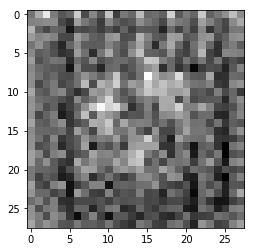

Epoch 1/2... Discriminator Loss: 0.4655... Generator Loss: 2.4740
Epoch 1/2... Discriminator Loss: 0.5554... Generator Loss: 2.0475
Epoch 1/2... Discriminator Loss: 0.4387... Generator Loss: 2.6276
Epoch 1/2... Discriminator Loss: 0.4073... Generator Loss: 2.9206
Epoch 1/2... Discriminator Loss: 0.4107... Generator Loss: 2.9983
Epoch 1/2... Discriminator Loss: 0.4405... Generator Loss: 2.7625
Epoch 1/2... Discriminator Loss: 0.4191... Generator Loss: 2.8438
Epoch 1/2... Discriminator Loss: 0.4491... Generator Loss: 2.6566
Epoch 1/2... Discriminator Loss: 0.4068... Generator Loss: 3.7316
Epoch 1/2... Discriminator Loss: 0.5062... Generator Loss: 2.2463


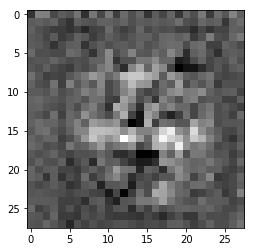

Epoch 1/2... Discriminator Loss: 0.6172... Generator Loss: 1.9588
Epoch 1/2... Discriminator Loss: 0.4176... Generator Loss: 2.8138
Epoch 1/2... Discriminator Loss: 0.4009... Generator Loss: 3.2112
Epoch 1/2... Discriminator Loss: 0.3813... Generator Loss: 3.5906
Epoch 1/2... Discriminator Loss: 0.6980... Generator Loss: 1.5147
Epoch 1/2... Discriminator Loss: 0.4125... Generator Loss: 2.8475
Epoch 1/2... Discriminator Loss: 0.3837... Generator Loss: 3.6386
Epoch 1/2... Discriminator Loss: 0.4088... Generator Loss: 3.0335
Epoch 1/2... Discriminator Loss: 0.4311... Generator Loss: 3.1847
Epoch 1/2... Discriminator Loss: 0.5489... Generator Loss: 1.9794


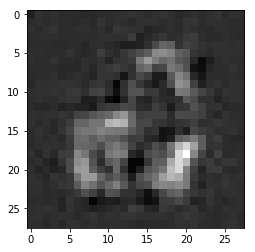

Epoch 1/2... Discriminator Loss: 0.3952... Generator Loss: 3.0558
Epoch 1/2... Discriminator Loss: 0.4109... Generator Loss: 2.7957
Epoch 1/2... Discriminator Loss: 0.5236... Generator Loss: 2.0669
Epoch 1/2... Discriminator Loss: 0.4632... Generator Loss: 3.7650
Epoch 1/2... Discriminator Loss: 0.6788... Generator Loss: 1.4788
Epoch 1/2... Discriminator Loss: 0.4732... Generator Loss: 2.3720
Epoch 1/2... Discriminator Loss: 0.3634... Generator Loss: 3.9668
Epoch 1/2... Discriminator Loss: 0.4020... Generator Loss: 2.9406
Epoch 1/2... Discriminator Loss: 0.3955... Generator Loss: 3.1725
Epoch 1/2... Discriminator Loss: 0.3571... Generator Loss: 4.7113


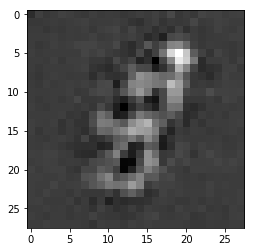

Epoch 1/2... Discriminator Loss: 0.4665... Generator Loss: 2.4569
Epoch 1/2... Discriminator Loss: 0.4400... Generator Loss: 2.4407
Epoch 1/2... Discriminator Loss: 0.3716... Generator Loss: 3.8581
Epoch 1/2... Discriminator Loss: 0.3568... Generator Loss: 4.3158
Epoch 1/2... Discriminator Loss: 0.4024... Generator Loss: 2.8190
Epoch 1/2... Discriminator Loss: 0.3686... Generator Loss: 3.8217
Epoch 1/2... Discriminator Loss: 0.3709... Generator Loss: 3.5804
Epoch 1/2... Discriminator Loss: 0.3702... Generator Loss: 3.4181
Epoch 1/2... Discriminator Loss: 1.3110... Generator Loss: 0.6528
Epoch 1/2... Discriminator Loss: 0.6619... Generator Loss: 1.7110


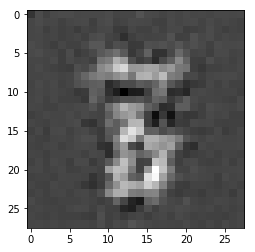

Epoch 1/2... Discriminator Loss: 0.4165... Generator Loss: 2.8414
Epoch 1/2... Discriminator Loss: 0.4096... Generator Loss: 2.8786
Epoch 1/2... Discriminator Loss: 0.6479... Generator Loss: 1.7707
Epoch 1/2... Discriminator Loss: 0.3770... Generator Loss: 3.2819
Epoch 1/2... Discriminator Loss: 0.4165... Generator Loss: 3.1100
Epoch 1/2... Discriminator Loss: 0.3742... Generator Loss: 3.4947
Epoch 1/2... Discriminator Loss: 0.4854... Generator Loss: 2.3547
Epoch 1/2... Discriminator Loss: 0.4089... Generator Loss: 2.9149
Epoch 1/2... Discriminator Loss: 0.3631... Generator Loss: 3.5890
Epoch 1/2... Discriminator Loss: 0.3761... Generator Loss: 3.6492


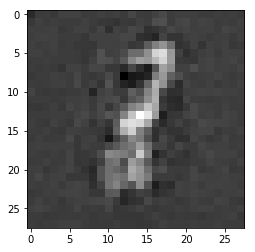

Epoch 1/2... Discriminator Loss: 0.3920... Generator Loss: 3.6038
Epoch 1/2... Discriminator Loss: 0.3631... Generator Loss: 3.6142
Epoch 1/2... Discriminator Loss: 0.5010... Generator Loss: 2.3573
Epoch 1/2... Discriminator Loss: 0.3654... Generator Loss: 3.5490
Epoch 1/2... Discriminator Loss: 0.3927... Generator Loss: 3.3460
Epoch 1/2... Discriminator Loss: 0.3981... Generator Loss: 2.9647
Epoch 1/2... Discriminator Loss: 0.5367... Generator Loss: 1.8854
Epoch 1/2... Discriminator Loss: 0.3793... Generator Loss: 4.0197
Epoch 1/2... Discriminator Loss: 0.3961... Generator Loss: 3.2508
Epoch 1/2... Discriminator Loss: 0.4079... Generator Loss: 2.8585


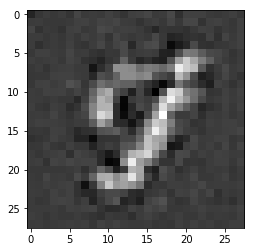

Epoch 1/2... Discriminator Loss: 0.3996... Generator Loss: 3.3206
Epoch 1/2... Discriminator Loss: 0.5073... Generator Loss: 2.1821
Epoch 1/2... Discriminator Loss: 0.3680... Generator Loss: 3.8417
Epoch 1/2... Discriminator Loss: 0.3998... Generator Loss: 3.9263
Epoch 1/2... Discriminator Loss: 0.3855... Generator Loss: 3.1921
Epoch 1/2... Discriminator Loss: 0.3842... Generator Loss: 3.3265
Epoch 1/2... Discriminator Loss: 0.3613... Generator Loss: 3.8664
Epoch 1/2... Discriminator Loss: 0.3859... Generator Loss: 3.4800
Epoch 1/2... Discriminator Loss: 0.4198... Generator Loss: 3.4032
Epoch 1/2... Discriminator Loss: 1.8703... Generator Loss: 0.4323


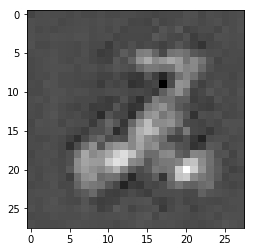

Epoch 1/2... Discriminator Loss: 0.4641... Generator Loss: 2.3217
Epoch 1/2... Discriminator Loss: 0.4292... Generator Loss: 2.7108
Epoch 1/2... Discriminator Loss: 0.6657... Generator Loss: 1.9668
Epoch 1/2... Discriminator Loss: 0.4137... Generator Loss: 3.1551
Epoch 1/2... Discriminator Loss: 4.3094... Generator Loss: 8.7809
Epoch 1/2... Discriminator Loss: 0.6998... Generator Loss: 1.4602
Epoch 1/2... Discriminator Loss: 0.4889... Generator Loss: 2.2463
Epoch 1/2... Discriminator Loss: 0.4100... Generator Loss: 2.9969
Epoch 1/2... Discriminator Loss: 0.4339... Generator Loss: 2.5029
Epoch 1/2... Discriminator Loss: 0.3839... Generator Loss: 3.2869


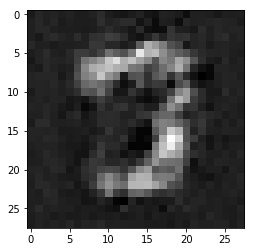

Epoch 1/2... Discriminator Loss: 0.4071... Generator Loss: 2.7483
Epoch 1/2... Discriminator Loss: 0.4227... Generator Loss: 2.7446
Epoch 1/2... Discriminator Loss: 0.4788... Generator Loss: 2.2610
Epoch 1/2... Discriminator Loss: 0.4522... Generator Loss: 2.3710
Epoch 1/2... Discriminator Loss: 0.4177... Generator Loss: 3.0783
Epoch 1/2... Discriminator Loss: 0.4193... Generator Loss: 3.0376
Epoch 1/2... Discriminator Loss: 0.4298... Generator Loss: 2.5946
Epoch 1/2... Discriminator Loss: 0.3720... Generator Loss: 3.6566
Epoch 1/2... Discriminator Loss: 0.4190... Generator Loss: 2.8036
Epoch 1/2... Discriminator Loss: 0.4636... Generator Loss: 2.3057


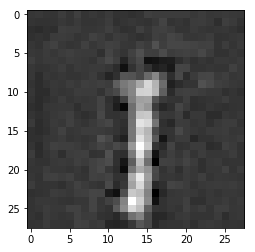

Epoch 1/2... Discriminator Loss: 0.3759... Generator Loss: 3.7492
Epoch 1/2... Discriminator Loss: 0.4004... Generator Loss: 3.5157
Epoch 1/2... Discriminator Loss: 0.3801... Generator Loss: 3.1897
Epoch 1/2... Discriminator Loss: 0.3970... Generator Loss: 2.9545
Epoch 1/2... Discriminator Loss: 1.4023... Generator Loss: 0.8529
Epoch 1/2... Discriminator Loss: 0.4136... Generator Loss: 2.8288
Epoch 1/2... Discriminator Loss: 0.4374... Generator Loss: 2.5948
Epoch 1/2... Discriminator Loss: 0.4493... Generator Loss: 2.4173
Epoch 1/2... Discriminator Loss: 0.5722... Generator Loss: 1.8996
Epoch 1/2... Discriminator Loss: 0.3810... Generator Loss: 3.2529


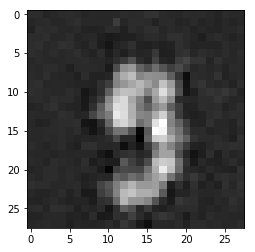

Epoch 1/2... Discriminator Loss: 0.4080... Generator Loss: 3.0870
Epoch 1/2... Discriminator Loss: 0.4668... Generator Loss: 2.2432
Epoch 1/2... Discriminator Loss: 0.4488... Generator Loss: 2.4622
Epoch 1/2... Discriminator Loss: 0.3952... Generator Loss: 3.0194
Epoch 1/2... Discriminator Loss: 0.4190... Generator Loss: 2.6483
Epoch 1/2... Discriminator Loss: 0.3994... Generator Loss: 2.9087
Epoch 1/2... Discriminator Loss: 0.6022... Generator Loss: 1.7881
Epoch 1/2... Discriminator Loss: 0.3574... Generator Loss: 3.9499
Epoch 1/2... Discriminator Loss: 0.5700... Generator Loss: 1.7604
Epoch 1/2... Discriminator Loss: 0.4063... Generator Loss: 3.0009


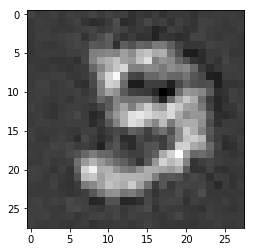

Epoch 1/2... Discriminator Loss: 0.5490... Generator Loss: 1.8550
Epoch 1/2... Discriminator Loss: 0.3675... Generator Loss: 3.6300
Epoch 1/2... Discriminator Loss: 0.3872... Generator Loss: 3.1021
Epoch 1/2... Discriminator Loss: 0.5556... Generator Loss: 1.9262
Epoch 1/2... Discriminator Loss: 0.3701... Generator Loss: 3.5126
Epoch 1/2... Discriminator Loss: 0.4305... Generator Loss: 2.5317
Epoch 1/2... Discriminator Loss: 0.3914... Generator Loss: 3.1067
Epoch 1/2... Discriminator Loss: 3.5768... Generator Loss: 0.1359
Epoch 1/2... Discriminator Loss: 0.6124... Generator Loss: 1.6673
Epoch 1/2... Discriminator Loss: 0.5549... Generator Loss: 1.8361


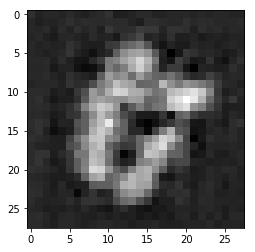

Epoch 1/2... Discriminator Loss: 0.5244... Generator Loss: 2.0358
Epoch 1/2... Discriminator Loss: 0.5662... Generator Loss: 1.7121
Epoch 1/2... Discriminator Loss: 0.4770... Generator Loss: 2.1081
Epoch 1/2... Discriminator Loss: 0.4656... Generator Loss: 2.3156
Epoch 1/2... Discriminator Loss: 0.4685... Generator Loss: 2.2741
Epoch 1/2... Discriminator Loss: 0.3800... Generator Loss: 3.3300


KeyboardInterrupt: 

In [92]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.